# 데이터(moviedatas.csv) 불러오기

In [34]:
import pandas as pd
import numpy as np
moviedata = pd.read_csv("moviedata.csv", header = 0)

moviedata.shape

(55718, 3)

In [35]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 폰트 설정
mpl.rc('font', family='NanumGothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

In [36]:
moviedata = moviedata.set_index('movie_name')
moviedata.head()


,star_score,document
movie_name,,
아틱,7,너무 집중하면 관람 후 피곤할 영화 생존기 열린 결말
쥬라기 월드,7,공룡들 보는 재미가 있네
패왕별희 디 오리지널,10,도망쳤던 데이가 경극을 보고 눈물을 흘릴 때 나도 함께 울었다 눈물을 닦아주고 싶었다
침묵,9,관계에 있어 본인 입장에서의 다른 해석 그 해석 까진 좋으나 정리하지 못한 감정의 ...
자산어보,8,더 나은 내일을 말하고 싶은 진보 꼰대와 오늘의 입신양명에 몸달은 젊은 보수의 화해...


In [5]:
moviedata.tail()

,star_score,document
movie_name,,
트럼보,8,예술계의 블랙리스트로 인해 그 시절 예술가들이 어떻게 살아왔는지 알 수 있는 영화였...
해리 포터와 혼혈 왕자,10,다시 봐도 여운에 젖게 하는 영화
분노의 질주: 더 얼티메이트,4,정말 재미없네요 액션도 전혀 심장 쫄리지도 않고 스토리는 개연성 밥 말아먹고 ...
내 머리 속의 지우개,10,웰메이드 영화 꼭 봐야 할 영화 아름다운 영화 오랫동안 화제 되는 데는 이유가 있...
아들의 이름으로,10,양심선언의 필요성 피해자들은 발 뻗고 잠 못 잔다는 걸 보여준 영화 그 시절 진압...


In [6]:
moviedata.describe()

,star_score
count,55718.000000
mean,7.891597
std,3.088041
min,1.000000
25%,7.000000
50%,10.000000
75%,10.000000
max,10.000000


In [8]:
count_set = moviedata.groupby( by = ['star_score']).count()
count_set

,document
star_score,
1,4756
2,2986
3,414
4,1898
5,1008
6,2850
7,2072
8,5380
9,3082


In [9]:
sum_star_score = sum(count_set['document'])
sum_star_score

55718

<AxesSubplot:xlabel='star_score', ylabel='count'>

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


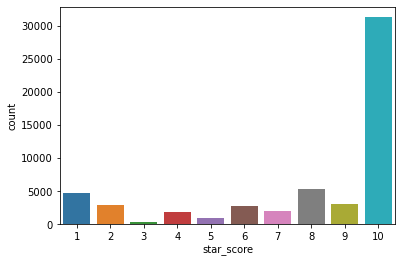

In [10]:
import seaborn as sns

graph = sns.countplot(data = moviedata, x = 'star_score')
graph

In [11]:
#가중치설정하기 ( 전체 평점데이터 갯수 / 해당 카테고리 평점 데이터 갯수)
weight = {0:0.}
for key in range(1, 11):
    weight[key] = (sum_star_score/count_set['document'][key])
weight

{0: 0.0,
 1: 11.715306980656013,
 2: 18.65974547890154,
 3: 134.58454106280195,
 4: 29.356164383561644,
 5: 55.27579365079365,
 6: 19.55017543859649,
 7: 26.89092664092664,
 8: 10.356505576208178,
 9: 18.078520441271902,
 10: 1.7817216679457661}

# 형태소 분석(어간 추출 및 불용어 전처리)

In [12]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

#konlpy의 Okt()를 통해 형태소 분석하기
from konlpy.tag import Okt 
okt = Okt()

In [13]:
# review의 어간(stem)만 추출
moviedata['stem'] = moviedata['document'].apply(lambda x: okt.morphs(x, stem=True))
review_stem = []  #review 어간 데이터리스트
for i in range(len(moviedata)):
    review_stem.extend(moviedata['stem'][i])

In [14]:
# review의 명사만 추출
moviedata['nouns'] = moviedata['document'].apply(lambda x: okt.nouns(x))
review_nouns = []  #review 명사 데이터리스트
for i in range(len(moviedata)):
    review_nouns.extend(moviedata['nouns'][i])                                         

In [15]:
review_stem

['너무',
 '집중',
 '하다',
 '관람',
 '후',
 '피곤하다',
 '영화',
 '생존',
 '기',
 '열리다',
 '결말',
 '공룡',
 '들',
 '보다',
 '재미',
 '가',
 '있다',
 '도망치다',
 '데이',
 '가',
 '경극',
 '을',
 '보고',
 '눈물',
 '을',
 '흘리다',
 '때',
 '나다',
 '함께',
 '울다',
 '눈물',
 '을',
 '닦다',
 '싶다',
 '관계',
 '에',
 '있다',
 '본인',
 '입장',
 '에서의',
 '다른',
 '해석',
 '그',
 '해석',
 '까진',
 '좋다',
 '정리',
 '하다',
 '못',
 '한',
 '감정',
 '의',
 '표',
 '추다',
 '빚',
 '어',
 '내다',
 '비극',
 '적',
 '결말',
 '그',
 '비극',
 '마저도',
 '묵묵하다',
 '책임지다',
 '따라가다',
 '하다',
 '중년',
 '의',
 '고뇌',
 '최민식',
 '배우',
 '의',
 '연기',
 '가',
 '아니다',
 '이',
 '정도',
 '의',
 '전달',
 '력',
 '이',
 '나오다',
 '싶다',
 '수작',
 '이다',
 '연출',
 '도',
 '아주',
 '좋다',
 '더',
 '나은',
 '내일',
 '을',
 '말',
 '하고',
 '싶다',
 '진보',
 '꼰대',
 '와',
 '오늘',
 '의',
 '입신양명',
 '에',
 '몸달',
 '은',
 '젊다',
 '보수',
 '의',
 '화해',
 '를',
 '그리고',
 '싶다',
 '것',
 '같다',
 '원',
 '나이트',
 '내용',
 '쓰레기',
 '오래간만',
 '에',
 '영화관',
 '에서',
 '스트레스',
 '해소',
 '하고',
 '오다',
 '괴수',
 '들',
 '의',
 '액션',
 '신',
 '과',
 '이',
 '짱',
 '재밌다',
 '자다',
 '만들다',
 '탈구',
 '되다',
 '어깨',
 '를',
 '끼우다',
 '콩',
 '이라니',
 

In [16]:
review_nouns

['집중',
 '관람',
 '후',
 '영화',
 '생존',
 '기',
 '결말',
 '공룡',
 '재미',
 '데이',
 '경극',
 '보고',
 '눈물',
 '때',
 '눈물',
 '관계',
 '본인',
 '입장',
 '다른',
 '해석',
 '그',
 '해석',
 '정리',
 '못',
 '감정',
 '표',
 '빚',
 '비극',
 '결말',
 '그',
 '비극',
 '중년',
 '고뇌',
 '최민식',
 '배우',
 '연기',
 '이',
 '정도',
 '전달',
 '수작',
 '연출',
 '아주',
 '더',
 '나은',
 '내일',
 '말',
 '진보',
 '꼰대',
 '오늘',
 '입신양명',
 '몸달',
 '보수',
 '화해',
 '것',
 '원',
 '나이트',
 '내용',
 '쓰레기',
 '영화관',
 '스트레스',
 '해소',
 '괴수',
 '액션',
 '신',
 '이',
 '짱',
 '탈구',
 '어깨',
 '콩',
 '생각',
 '보기',
 '분위기',
 '양조위',
 '그',
 '눈빛',
 '시체',
 '팔이',
 '좀',
 '얼굴',
 '맛',
 '나',
 '영화',
 '김승훈',
 '연기',
 '것',
 '처음',
 '연기',
 '게',
 '계속',
 '의문',
 '스토리',
 '만',
 '영화',
 '것',
 '턴',
 '더',
 '스트리트',
 '파이팅',
 '김승훈',
 '파이팅',
 '마지막',
 '부분',
 '인셉션',
 '연상',
 '나름',
 '구성',
 '보고',
 '시간',
 '아르바이트',
 '짬',
 '잠깐',
 '봄',
 '이',
 '괴수영화',
 '스토리',
 '개연',
 '평론가',
 '엿드세',
 '난',
 '최고',
 '진짜',
 '스크린',
 '보',
 '감동',
 '두',
 '배',
 '올해',
 '최고',
 '영화',
 '후편',
 '꼭',
 '국내',
 '극장',
 '개봉',
 '진짜',
 '재미',
 '좃도옶고',
 '거',
 '볼',
 '바',
 '집',
 '좃갓',
 '모로',
 '분',
 '

C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48372 missing from c

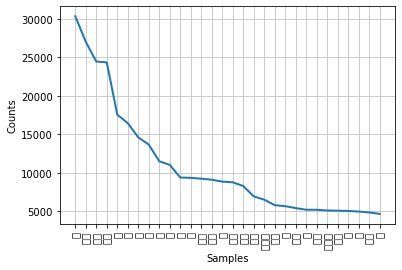

In [17]:
# 각 단어의 사용빈도를 시각화
from nltk import Text
kolaw = Text(review_stem, name = "kolaw")
kolaw.plot(30)
plt.show()

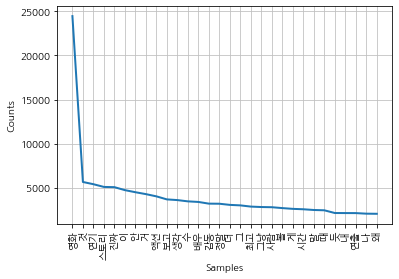

In [16]:
kolaw = Text(review_nouns, name = "kolaw")
kolaw.plot(30)
plt.show()

In [17]:
# 자주 쓰이는 불용어 리스트를 stop_words로 저장
stop_words = '아 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼	어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 하기는한데  어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓'
stop_words = stop_words.split(' ')
stop_words

['아',
 '휴',
 '아이구',
 '아이쿠',
 '아이고',
 '어',
 '나',
 '우리',
 '저희',
 '따라',
 '의해',
 '을',
 '를',
 '에',
 '의',
 '가',
 '으로',
 '로',
 '에게',
 '뿐이다',
 '의거하여',
 '근거하여',
 '입각하여',
 '기준으로',
 '예하면',
 '예를',
 '들면',
 '예를',
 '들자면',
 '저',
 '소인',
 '소생',
 '저희',
 '지말고',
 '하지마',
 '하지마라',
 '다른',
 '물론',
 '또한',
 '그리고',
 '비길수',
 '없다',
 '해서는',
 '안된다',
 '뿐만',
 '아니라',
 '만이',
 '아니다',
 '만은',
 '아니다',
 '막론하고',
 '관계없이',
 '그치지',
 '않다',
 '그러나',
 '그런데',
 '하지만',
 '든간에',
 '논하지',
 '않다',
 '따지지',
 '않다',
 '설사',
 '비록',
 '더라도',
 '아니면',
 '만',
 '못하다',
 '하는',
 '편이',
 '낫다',
 '불문하고',
 '향하여',
 '향해서',
 '향하다',
 '쪽으로',
 '틈타',
 '이용하여',
 '타다',
 '오르다',
 '제외하고',
 '이',
 '외에',
 '이',
 '밖에',
 '하여야',
 '비로소',
 '한다면',
 '몰라도',
 '외에도',
 '이곳',
 '여기',
 '부터',
 '기점으로',
 '따라서',
 '할',
 '생각이다',
 '하려고하다',
 '이리하여',
 '그리하여',
 '그렇게',
 '함으로써',
 '하지만',
 '일때',
 '할때',
 '앞에서',
 '중에서',
 '보는데서',
 '으로써',
 '로써',
 '까지',
 '해야한다',
 '일것이다',
 '반드시',
 '할줄알다',
 '할수있다',
 '할수있어',
 '임에',
 '틀림없다',
 '한다면',
 '등',
 '등등',
 '제',
 '겨우',
 '단지',
 '다만',
 '할뿐',
 '딩동',
 '댕그',
 '대해서',
 '대하여',
 '대하면',


In [18]:
# 정확도를 높이기 위해 빈도수가 많은 쓸모없는 stem들을 불용어로 추가해서 불용어 제거처리
# 1. 영화, 연기, 스토리, 것, 진짜, 생각, 이 , 배우, 사람, 정말, 더 , 그 , 보고, 수 , 때, 볼, 말, 감독, 점, 왜,고질라, 나, 내 불용어 처리
# 2. 이, 하다, 보다, 의, 에, 을, 가 , 들, 도, 를, 은, 는, 이다, 있다, 너무, 되다, 한, 같다, 으로, 에서, 다, 것, 과 거 듣 질주 ㅋㅋ 못 듣
# 3. 분노 나다 걸 성 함 임 분 건 되어다 이고 랑 급 돼다 면 감 상미 서 라고 엔 고질라 에는 이라 이랑 애 남 위 지다 대다 대 용 놈 세 해 기 예요 이라고 냐 반 서인국 이란 니까 써다 잭 스나이더 식 연 라서 니 온 죠 처 
stop_words2 = '영화 연기 스토리 것 거 못 듯 질주 ㅋㅋ 안 진짜 생각 이 배우 사람 정말 더 그 보고 수 때 볼 말 감독 점 왜 나 내 이 하다 보다 의 에 을 가 들 도 를 은 는 이다 있다 너무 되다 한 같다 으로 에서 다 것 과 나오다 게 만들다 고 가다 요 오다 들다 그렇다 님 이렇다 콩 분노 나다 걸 성 함 임 분 건 되어다 이고 랑 급 돼다 면 감 상미 서 라고 엔 고질라 에는 이라 이랑 애 남 위 지다 대다 대 용 놈 세 해 기 예요 이라고 냐 반 서인국 이란 니까 써다 잭 스나이더 식 연 라서 니 온 죠 처'
stop_words2 = stop_words2.split(' ')
stop_words = stop_words+stop_words2
stop_words

['아',
 '휴',
 '아이구',
 '아이쿠',
 '아이고',
 '어',
 '나',
 '우리',
 '저희',
 '따라',
 '의해',
 '을',
 '를',
 '에',
 '의',
 '가',
 '으로',
 '로',
 '에게',
 '뿐이다',
 '의거하여',
 '근거하여',
 '입각하여',
 '기준으로',
 '예하면',
 '예를',
 '들면',
 '예를',
 '들자면',
 '저',
 '소인',
 '소생',
 '저희',
 '지말고',
 '하지마',
 '하지마라',
 '다른',
 '물론',
 '또한',
 '그리고',
 '비길수',
 '없다',
 '해서는',
 '안된다',
 '뿐만',
 '아니라',
 '만이',
 '아니다',
 '만은',
 '아니다',
 '막론하고',
 '관계없이',
 '그치지',
 '않다',
 '그러나',
 '그런데',
 '하지만',
 '든간에',
 '논하지',
 '않다',
 '따지지',
 '않다',
 '설사',
 '비록',
 '더라도',
 '아니면',
 '만',
 '못하다',
 '하는',
 '편이',
 '낫다',
 '불문하고',
 '향하여',
 '향해서',
 '향하다',
 '쪽으로',
 '틈타',
 '이용하여',
 '타다',
 '오르다',
 '제외하고',
 '이',
 '외에',
 '이',
 '밖에',
 '하여야',
 '비로소',
 '한다면',
 '몰라도',
 '외에도',
 '이곳',
 '여기',
 '부터',
 '기점으로',
 '따라서',
 '할',
 '생각이다',
 '하려고하다',
 '이리하여',
 '그리하여',
 '그렇게',
 '함으로써',
 '하지만',
 '일때',
 '할때',
 '앞에서',
 '중에서',
 '보는데서',
 '으로써',
 '로써',
 '까지',
 '해야한다',
 '일것이다',
 '반드시',
 '할줄알다',
 '할수있다',
 '할수있어',
 '임에',
 '틀림없다',
 '한다면',
 '등',
 '등등',
 '제',
 '겨우',
 '단지',
 '다만',
 '할뿐',
 '딩동',
 '댕그',
 '대해서',
 '대하여',
 '대하면',


In [19]:
#불용어제거 처리2
words = []
k = []
for w in moviedata['stem']:
    for i in w:
        if i not in stop_words:
            k.append(i)
    words.append(list(k))
    k = []

In [20]:
#불요어제거 완료된 words를 stem 열로 대체하기
moviedata['stem'] = words
moviedata['stem'] 

movie_name
아틱                                       [집중, 관람, 피곤하다, 생존, 열리다, 결말]
쥬라기 월드                                                      [공룡, 재미]
패왕별희 디 오리지널                  [도망치다, 데이, 경극, 눈물, 흘리다, 울다, 눈물, 닦다, 싶다]
침묵                 [관계, 본인, 입장, 에서의, 해석, 해석, 까진, 좋다, 정리, 감정, 표, 추...
자산어보               [나은, 내일, 싶다, 진보, 꼰대, 오늘, 입신양명, 몸달, 젊다, 보수, 화해,...
                                         ...                        
트럼보                [예술, 계, 블랙리스트, 인하다, 시절, 예술가, 어떻다, 살아오다, 문득, 우리...
해리 포터와 혼혈 왕자                                                [여운, 젖다]
분노의 질주: 더 얼티메이트         [재미없다, 액션, 전혀, 심장, 쫄리지, 개연, 밥, 말아먹다, 돈, 아깝다]
내 머리 속의 지우개        [웰, 메이드, 꼭, 아름답다, 오랫동안, 화제, 이유, 슬프다, 화나다, 우울하다...
아들의 이름으로           [양심선언, 필요성, 피해자, 발, 뻗다, 잠, 자다, 보여주다, 시절, 진압군, ...
Name: stem, Length: 55718, dtype: object

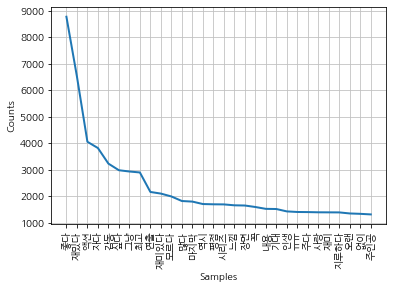

In [21]:
# 불용어 처리후에 어간 빈도수 시각화( 불용어처리 전보다 더 의미있는 단어들로 구성되 있음을 알 수 있음)
review_stem = []  #review 어간 데이터리스트
for i in range(len(moviedata)):
    review_stem.extend(moviedata['stem'][i])
    
kolaw = Text(review_stem, name = "kolaw")
kolaw.plot(30)
plt.show()

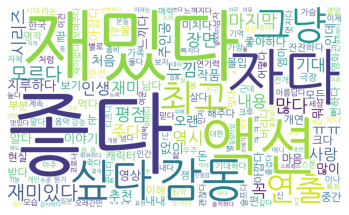

In [22]:
# 각 단어의 사용빈도를 워드클라우드를 통해 시각화
from wordcloud import WordCloud

font_path = r'C:\Users\hyunj\class101_autopython\NanumFontSetup_TTF_ALL\NanumGothic.ttf' #폰트 위치 설정
wc = WordCloud(width = 2000, height = 1200, background_color="white", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))
plt.axis("off")
plt.show()

# 모델링을 위한 리뷰 토크나이징 및 패딩

In [23]:
x = moviedata['stem'].values
y = moviedata['star_score'].values

In [24]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import text_to_word_sequence

MAX_FEATURE = 5000
token = Tokenizer(num_words = MAX_FEATURE)

Using TensorFlow backend.


In [25]:
token.fit_on_texts(x) #토큰화한 각 단어에 index를 부여
sequences =token.texts_to_sequences(x) #단어를 인덱스로 대체하기

In [26]:
token.word_index

{'좋다': 1,
 '재밌다': 2,
 '액션': 3,
 '자다': 4,
 '감동': 5,
 '싶다': 6,
 '그냥': 7,
 '최고': 8,
 '연출': 9,
 '재미있다': 10,
 '모르다': 11,
 '많다': 12,
 '마지막': 13,
 '역시': 14,
 '평점': 15,
 '시리즈': 16,
 '느낌': 17,
 '장면': 18,
 '꼭': 19,
 '내용': 20,
 '기대': 21,
 '인생': 22,
 'ㅠㅠ': 23,
 '주다': 24,
 '사랑': 25,
 '재미': 26,
 '지루하다': 27,
 '오랜': 28,
 '없이': 29,
 '주인공': 30,
 '많이': 31,
 '처음': 32,
 '추천': 33,
 '뭐': 34,
 '작품': 35,
 '이야기': 36,
 '인데': 37,
 '아쉽다': 38,
 '느끼다': 39,
 '알다': 40,
 '영상': 41,
 '좋아하다': 42,
 '마음': 43,
 '아깝다': 44,
 '눈물': 45,
 'ㅋㅋㅋ': 46,
 '크다': 47,
 '먹다': 48,
 '보기': 49,
 '캐릭터': 50,
 '편': 51,
 '중간': 52,
 '받다': 53,
 '엠마': 54,
 '미치다': 55,
 '개연': 56,
 '돈': 57,
 '이해': 58,
 '내내': 59,
 '모든': 60,
 '몰입': 61,
 '끝': 62,
 '남다': 63,
 '부분': 64,
 '눈': 65,
 '뻔하다': 66,
 '버리다': 67,
 '현실': 68,
 '해주다': 69,
 '어떻다': 70,
 '명작': 71,
 '한국': 72,
 '영화관': 73,
 '살다': 74,
 'ㅎㅎ': 75,
 '잼': 76,
 '잔잔하다': 77,
 '가족': 78,
 '맞다': 79,
 '반전': 80,
 '극장': 81,
 '기대하다': 82,
 '재미없다': 83,
 '연기력': 84,
 '이나': 85,
 '처럼': 86,
 '멋지다': 87,
 '스톤': 88,
 '괜찮다': 89,
 '슬프다

In [27]:
sequences

[[198, 220, 3023, 1842, 2463, 103],
 [3229, 26],
 [2583, 2709, 45, 458, 115, 45, 4036, 6],
 [917,
  541,
  855,
  971,
  1062,
  1062,
  1397,
  1,
  1907,
  141,
  1504,
  1589,
  3024,
  111,
  1063,
  103,
  1063,
  4037,
  3698,
  1505,
  2352,
  3699,
  1843,
  756,
  257,
  6,
  368,
  9,
  133,
  1],
 [1777, 1398, 6, 2848, 4947, 297, 698, 3440, 1719, 6],
 [4948, 20, 185],
 [134, 73, 182, 1399, 291, 3, 117, 283],
 [2, 4],
 [3230, 1188, 972, 195, 29, 49, 10],
 [179, 284, 2584, 596],
 [3231, 1778, 691],
 [269, 262],
 [2235, 32, 79, 113, 1216, 1, 28, 1, 276, 4949, 4471, 1217, 2235, 1217],
 [13, 64, 2849, 2236, 240, 89, 548, 75],
 [6, 3441, 4950, 4951, 131],
 [816, 56, 779, 121, 8],
 [23, 2, 721, 5, 549, 489, 8, 4952, 19, 1538, 81, 175, 69],
 [26, 438, 419, 1166],
 [328, 1844, 47, 1364, 33],
 [32, 62, 692, 270],
 [1167, 628, 48, 177, 50, 569, 132, 2710, 174, 292, 99, 40],
 [1666,
  221,
  73,
  4,
  420,
  115,
  2850,
  346,
  3232,
  2464,
  492,
  338,
  11,
  75,
  71,
  181,
  1

In [28]:
# 최대 문장 개수 찾기 
max_count = 0
for sen in x :
    tmp = len(sen)
    if tmp > max_count:
        max_count = tmp

# 최대 개수 만큼 일정하게 패딩
padded_x = pad_sequences(sequences, maxlen=max_count, dtype='int32', 
                                           padding='pre', truncating='pre', value=0.)
# 평점데이터를 카테고리화
from keras.utils import np_utils
y= np_utils.to_categorical(y, dtype = int)

# 임베딩에 입력될 단어 수 지정 
word_size = len(token.word_index)+1

In [29]:
print('패딩 된 x (리뷰데이터)  \n',padded_x, '\n\n')
print('카테고리화 된 y (평점)  \n',y[:5])

패딩 된 x (리뷰데이터)  
 [[   0    0    0 ... 1842 2463  103]
 [   0    0    0 ...    0 3229   26]
 [   0    0    0 ...   45 4036    6]
 ...
 [   0    0    0 ... 1650   57   44]
 [   0    0    0 ...  797 1798 2159]
 [   0    0    0 ... 2134  252  911]] 


카테고리화 된 y (평점)  
 [[0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 0]]


# 모델링

In [30]:
# 학습 데이터와 검증데이터로 나누는 함수
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(padded_x, y, test_size=0.2, stratify=y, random_state=5)

In [31]:
# 딥러닝
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import np_utils
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow import keras
import tensorflow as tf

# 더이상 성능 향상이 이루어지지 않는다면 조기 중단시킬 수 있는 함수
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [32]:
#모델링
model = Sequential()
model.add(Embedding(word_size,120, input_length = max_count))  #?
model.add(LSTM(120))  #?
model.add(Dense(11, activation = 'softmax'))
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [33]:
# EarlysStopping callback
callback = EarlyStopping(monitor='val_loss', patience=5)

# 저장 콜백
model_path = 'models/{epoch}_영화데이터로만든모델s.hdf5'
callback2 = ModelCheckpoint(filepath=model_path)

In [34]:
history = model.fit(x_train, y_train,validation_data=(x_test,y_test),class_weight=weight, epochs=100, callbacks=[callback2])
#EPOCH11로 모델 결정 그 이후에는 val_loss가 높아져 오버피팅의 위험이 있음

Epoch 1/100
1393/1393 [==============================] - 194s 134ms/step - loss: 21.9519 - accuracy: 0.2991 - val_loss: 1.8616 - val_accuracy: 0.3447
Epoch 2/100
1393/1393 [==============================] - 172s 124ms/step - loss: 19.0440 - accuracy: 0.4293 - val_loss: 1.6560 - val_accuracy: 0.4291
Epoch 3/100
1393/1393 [==============================] - 167s 120ms/step - loss: 17.6814 - accuracy: 0.4537 - val_loss: 1.6727 - val_accuracy: 0.4217
Epoch 4/100
1393/1393 [==============================] - 173s 124ms/step - loss: 16.0793 - accuracy: 0.5023 - val_loss: 1.6983 - val_accuracy: 0.3971
Epoch 5/100
1393/1393 [==============================] - 190s 136ms/step - loss: 14.5381 - accuracy: 0.5316 - val_loss: 1.6531 - val_accuracy: 0.4461
Epoch 6/100
1393/1393 [==============================] - 177s 127ms/step - loss: 12.9014 - accuracy: 0.5636 - val_loss: 1.6145 - val_accuracy: 0.4156
Epoch 7/100
1393/1393 [==============================] - 169s 121ms/step - loss: 11.7329 - accuracy:

KeyboardInterrupt: 

In [42]:
model = keras.models.load_model('models/10_영화데이터로만든모델s.hdf5')

# score() : 리뷰를 입력하면 어간추출, 토큰화 후 평점을 예측

In [43]:
#극단적인 함수
def score():
    x = input()
    #stem 추출하기
    stems = okt.morphs(x, stem=True)
    words = []
    for w in stems:
        if w not in stop_words:
            words.append(w)
    # 토근화하기
    token_word = token.texts_to_sequences(words)
    padded_test = pad_sequences(token_word, maxlen=max_count, dtype='int32', 
                                           padding='pre', truncating='pre', value=0.)
    score_array = model.predict(padded_test)
    #점수 내기
    score = 0
    for j in range(len(score_array)):
        score += np.argmax(score_array[j])
    score = score/len(score_array)
        
    return round(score,2)

예시(극단적)

In [52]:
score()

개노잼입니다


1.0

In [54]:
score()

보지마세요


2.0

In [46]:
score()

너무 재밌었어요


10.0

In [47]:
score()

올해 최고의 영화인것 같아요


8.0

In [49]:
score()

영화가 지루해요


2.0

실제 영화 리뷰에서 예측력이 떨어지는 사례
- 리뷰가 길어지거나, 추상적인 문장, 단어를 쓰는 경우 -> 예측 정확도 떨어짐

In [55]:
score()
#실제 1점 (꼴점, 10R연 등 맞춤법검사기에 걸러지지 못하는 추상적 단어로 인해 정확한 예측 실패)

나라를 체류자 판으로 만들려는 이자스민 개같은 연때문에 꼴점 박고 감 10R연


6.62

In [56]:
score()
#실제 2점 (리뷰가 너무 길어질 때 예측력이 떨어짐)

대부분의 팬들이 예상은 했지만 설마 했던 거기까지 갔음. 이제 이 영화는 스토리도 그렇고 액션도 그렇고 더 이상 지구에서 할 수 있는 것이 없음. 사실상 슈퍼히어로임. 다음 편 대충 예상 한 번 해봄. 제목 분노의 질주 : 더 유니버스 내용은 이제 외계인 무조건 나오고 지구 침공 달에서 닷지 차저로 외계인과 드래그 레이스하고 어찌 저찌 해서 지구를 구해냄. 쿠키가 핵심인데 마지막 외계인 무찌르고 기존 패턴처럼 똑같이 다 모여서 밥 먹기 전에 식사기도 하고 있는데 빈디젤 왼쪽에서 원이 그려지고 닥터스트레인지가 나오더니 멀티버스 어쩌고 얘기하면서 "위니드유어헬프" 이러니까 빈디젤이 "후아유" 라고 하고 갑자기 닥터스트레인지 뒤에서 그루트가 나오더니 빈디젤한테 "아임그루트" 이러고 끝남. (이런 내용 아니면 이제 이 시리즈 안 봄 / 스카이라인 때문에 별1개 줌)


6.41

In [57]:
score()
#실제 8점

원작이 101마리 달마시안이었다는건 몰랐음 ㄷㄷㄷ 스토리 자체도 재밌는데 무엇보다 패션이랑 관련된 영상미가 좋아서 눈이 즐겁다고 해야하나? 엄청 화려함 ㅋㅋㅋㅋ 보면 후회안해요


6.43

In [58]:
score()
#실제 2점

억지 재미 억지 감동 억지 스토리


3.6

In [59]:
score()
#실제 1점

한심한 개연성, 배우들의 어색한 욕, 이해가 되지 않는 상황 전개시간 아까운 영화


3.8

In [60]:
score()
#실제 7점

지금까지 나온 시리즈의 요약본같은 느낌 & 앞으로도 이어가고싶은건가?하는 생각이 드네요. 반가운 배우들도 나오고 액션도 좋고 했으나 뭔가 억지로 정리하려는 느낌이 들었습니다. 내용에 대해서는 기존 시리즈를 본 사람은 이해를 하지만 처음 접하는분들에게는 무슨얘기야? 저게 누군데? 하는 느낌을 받으실것같네요 분노의 질주 팬으로써 다음 시리즈가 나온다면 또 볼 예정이지만 아쉬움이 남습니다. 그래도 재미있게 볼만한 영화라고 생각합니다.


5.85

In [61]:
score()
#실제 3점

코로나가 여러 영화 망친다는 느낌..정리되지 않는 엉뚱한 상상력..^&^ 


6.44

In [62]:
score()
#실제 7점

영화 소재로 써먹기 좋은 ‘파리대왕’의 SF 버전. 솔직히 클리셰 범벅이고 뻔할뻔자의 전개로 흘러가서 흥미로운 부분은 없다. 약간 모튼 틸덤 감독의 ‘패신저스’와 같은 느낌. 아쉬운 점은 많지만, 내가 워낙 좋아하는 주제이기에 개인적으로 만족.


6.25

In [63]:
score()
#실제 8점

다들 스토리가 산이니 뭐니 하는데 신나는 음악에 질주하는 장면만 봐도 심장이 벌렁거리는 현 유일한 영화임스토리충 비난에 동의할수없음


6.54

In [64]:
score()
#실제 3점

와 여기 다 평점 알바냐 ㅋㅋ 1시간 20분 동안 뭐만 찾아다니다가 후반에 가서야 전투 씬이네...메카 고질라도 너무 어이없고...오히려 전작은 뭔가 더 납득할만한 이유라도 있었지...이건 뭐 전작보다 더 납득하기 힘들고 재미도 떨어짐...중간 중간 구멍이 너무 많은데 그냥 생략 하련다...


5.36

In [69]:
score()
#실제 2점

쓰레기영화ㅋㅋ쓰레기.


3.0

In [66]:
score()
#실제 4점

자동차로 우주가는건 너무하잔아ㅡㅡ죽은사람이 살이나고ㅡㅡ단물다빼먹은 껌같은 영화 


4.73